In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
crime_df=pd.read_csv("G:\Semester VI\INT247\Project\Indian-Crime-Data-master\Indian-Crime-Data-master\crime_data.csv")

In [3]:
crime_df

,States/UTs,District,Year,Murder,Attempt to commit Murder,Culpable Homicide not amounting to Murder,Attempt to commit Culpable Homicide,Rape,Custodial Rape,Custodial_Gang Rape,...,Offences promoting enmity between different groups,Promoting enmity between different groups,"Imputation, assertions prejudicial to national integration",Extortion,Disclosure of Identity of Victims,Incidence of Rash Driving,HumanTrafficking,Unnatural Offence,Other IPC crimes,Total Cognizable IPC crimes
0,Andhra Pradesh,Anantapur,2014,134,171,8,0,35,0,0,...,0,0,0,0,0,1038,0,0,3800,8376
1,Andhra Pradesh,Chittoor,2014,84,170,2,0,32,0,0,...,0,0,0,19,0,249,0,0,2567,5374
2,Andhra Pradesh,Cuddapah,2014,80,162,1,0,28,0,0,...,0,0,0,0,0,948,0,0,2604,5803
3,Andhra Pradesh,East Godavari,2014,64,84,2,0,85,0,0,...,0,0,0,32,0,39,0,0,3791,7630
4,Andhra Pradesh,Guntakal Railway,2014,14,4,0,0,0,0,0,...,0,0,0,0,0,1,0,0,37,490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,Delhi UT,Vigilance,2014,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
797,Delhi UT,West,2014,55,77,6,101,251,0,0,...,0,0,0,16,0,984,10,19,3206,18488
798,Lakshadweep,Lakshadweep,2014,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,30,81
799,Puducherry,Karaikal,2014,6,1,0,0,3,0,0,...,2,2,0,0,1,199,0,0,322,671


In [4]:
crime_df.columns

Index(['States/UTs', 'District', 'Year', 'Murder', 'Attempt to commit Murder',
       'Culpable Homicide not amounting to Murder',
       'Attempt to commit Culpable Homicide', 'Rape', 'Custodial Rape',
       'Custodial_Gang Rape', 'Custodial_Other Rape',
       'Rape other than Custodial', 'Rape_Gang Rape', 'Rape_Others',
       'Attempt to commit Rape', 'Kidnapping & Abduction_Total',
       'Kidnapping & Abduction', 'Kidnapping & Abduction in order to Murder',
       'Kidnapping for Ransom',
       'Kidnapping & Abduction of Women to compel her for marriage',
       'Other Kidnapping', 'Dacoity', 'Dacoity with Murder', 'Other Dacoity',
       'Making Preparation and Assembly for committing Dacoity', 'Robbery',
       'Criminal Trespass/Burglary', 'Criminal Trespass or Burglary',
       'House Trespass & House Breaking', 'Theft', 'Auto Theft',
       'Other Thefts', 'Unlawful Assembly', 'Riots', 'Riots_Communal',
       'Riots_Industrial', 'Riots_Political', 'Riots_Caste Conflict',


# Selection of Features

In [5]:
crime_data=crime_df[['States/UTs','District','Year','Murder','Rape','Dacoity','Riots','Forgery','Acid attack','Sexual Harassment','Incidence of Rash Driving','HumanTrafficking','Total Cognizable IPC crimes']]
crime_data.head()

,States/UTs,District,Year,Murder,Rape,Dacoity,Riots,Forgery,Acid attack,Sexual Harassment,Incidence of Rash Driving,HumanTrafficking,Total Cognizable IPC crimes
0,Andhra Pradesh,Anantapur,2014,134,35,6,214,0,1,82,1038,0,8376
1,Andhra Pradesh,Chittoor,2014,84,32,12,134,0,0,0,249,0,5374
2,Andhra Pradesh,Cuddapah,2014,80,28,3,104,0,0,212,948,0,5803
3,Andhra Pradesh,East Godavari,2014,64,85,3,27,0,0,159,39,0,7630
4,Andhra Pradesh,Guntakal Railway,2014,14,0,2,1,0,0,0,1,0,490


In [6]:
crime_data=crime_data.rename(columns={'Total Cognizable IPC crimes':'Total IPC Crimes'})
crime_data.head()

,States/UTs,District,Year,Murder,Rape,Dacoity,Riots,Forgery,Acid attack,Sexual Harassment,Incidence of Rash Driving,HumanTrafficking,Total IPC Crimes
0,Andhra Pradesh,Anantapur,2014,134,35,6,214,0,1,82,1038,0,8376
1,Andhra Pradesh,Chittoor,2014,84,32,12,134,0,0,0,249,0,5374
2,Andhra Pradesh,Cuddapah,2014,80,28,3,104,0,0,212,948,0,5803
3,Andhra Pradesh,East Godavari,2014,64,85,3,27,0,0,159,39,0,7630
4,Andhra Pradesh,Guntakal Railway,2014,14,0,2,1,0,0,0,1,0,490


In [7]:
crime_data["States/UTs"].value_counts()

Uttar Pradesh        76
Madhya Pradesh       55
Maharashtra          46
Bihar                46
Rajasthan            42
Tamil Nadu           42
Gujarat              41
Karnataka            36
Odisha               36
Jammu & Kashmir      30
West Bengal          30
Assam                28
Chhattisgarh         28
Punjab               28
Jharkhand            26
Haryana              24
Kerala               21
Andhra Pradesh       20
Delhi UT             19
Arunachal Pradesh    19
Himachal Pradesh     15
Uttarakhand          13
Telangana            13
Meghalaya            11
Nagaland             11
Manipur              10
Mizoram               9
Tripura               9
Sikkim                5
Goa                   3
A&N Islands           3
Daman & Diu           2
Puducherry            2
Lakshadweep           1
D&N Haveli            1
Name: States/UTs, dtype: int64

# Visualizing the crime data using barplots, scatterplots and histograms

### Murder Committed in each States/UTs

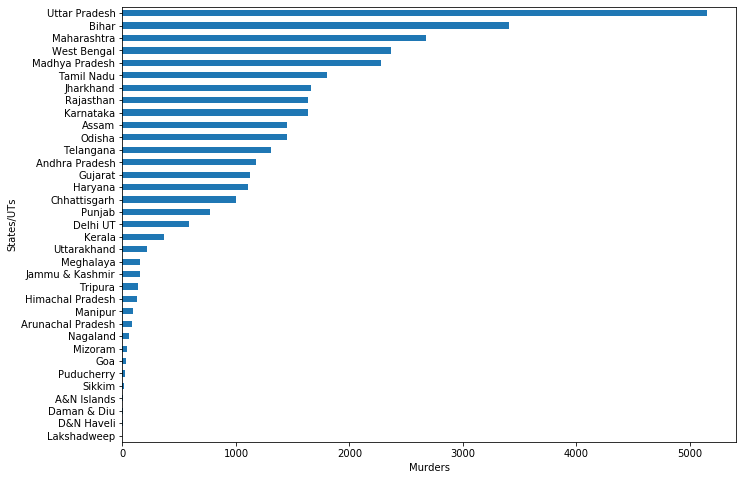

In [8]:
x = crime_data.groupby('States/UTs')['Murder'].sum().sort_values()
plt.figure(figsize=(11,8))
plt.xlabel("Murders")
plt.ylabel("States/UTs")
x.plot(kind='barh')

### Total IPC Crimes in each State

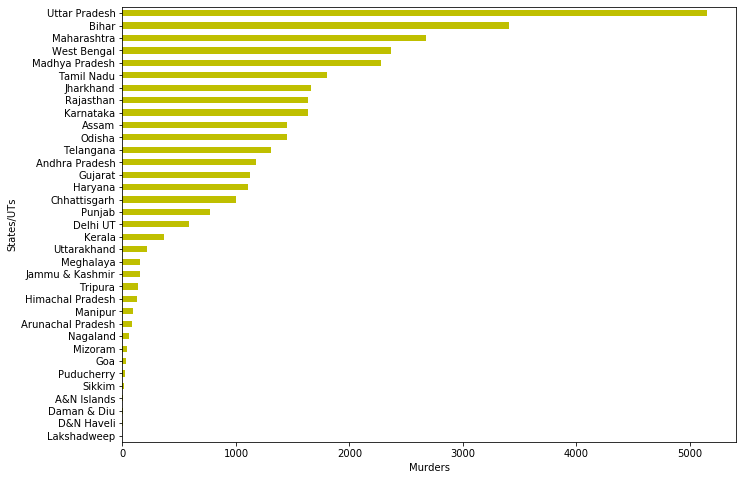

In [9]:
y = crime_data.groupby('States/UTs')['Total IPC Crimes'].sum().sort_values()
plt.figure(figsize=(11,8))
plt.xlabel("Murders")
plt.ylabel("States/UTs")
x.plot(kind='barh',color='y')

### Total number of each type of Crime

<BarContainer object of 5 artists>

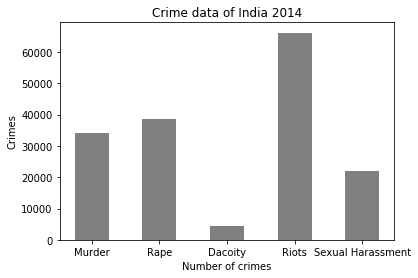

In [10]:
crimes=['Murder','Rape','Dacoity','Riots','Sexual Harassment']
number=[crime_data[crime].sum() for crime in crimes]
plt.title("Crime data of India 2014")
plt.xlabel("Number of crimes")
plt.ylabel("Crimes")
plt.bar(crimes,number,0.5,color='grey')

### Scatterplot

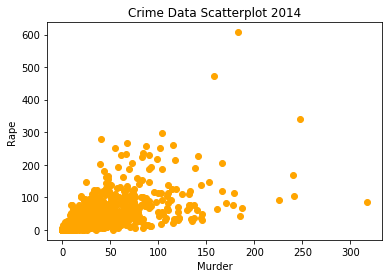

In [11]:
fig, ax = plt.subplots()
ax.scatter(crime_data["Murder"], crime_data["Rape"],c='orange')
plt.xlabel("Murder")
plt.ylabel("Rape")
plt.title("Crime Data Scatterplot 2014")
plt.show()

### Histogram for Murder

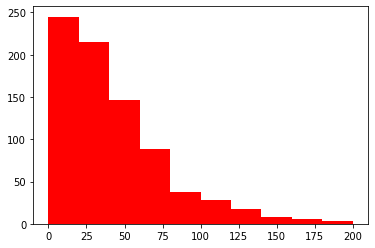

In [12]:
fig, ax = plt.subplots()
ax.hist(crime_data['Murder'], range=(0,200), align='mid', histtype='stepfilled',color='r')
plt.show()

# Segmentation of crime data using K means Clustering

In [13]:
crime_data.head(10)

,States/UTs,District,Year,Murder,Rape,Dacoity,Riots,Forgery,Acid attack,Sexual Harassment,Incidence of Rash Driving,HumanTrafficking,Total IPC Crimes
0,Andhra Pradesh,Anantapur,2014,134,35,6,214,0,1,82,1038,0,8376
1,Andhra Pradesh,Chittoor,2014,84,32,12,134,0,0,0,249,0,5374
2,Andhra Pradesh,Cuddapah,2014,80,28,3,104,0,0,212,948,0,5803
3,Andhra Pradesh,East Godavari,2014,64,85,3,27,0,0,159,39,0,7630
4,Andhra Pradesh,Guntakal Railway,2014,14,0,2,1,0,0,0,1,0,490
5,Andhra Pradesh,Guntur,2014,105,49,5,78,16,0,17,846,0,6897
6,Andhra Pradesh,Guntur Urban,2014,51,40,5,8,22,0,0,691,0,5798
7,Andhra Pradesh,Krishna,2014,51,80,0,9,0,0,98,70,0,7078
8,Andhra Pradesh,Kurnool,2014,118,32,3,108,0,0,81,1313,0,8398
9,Andhra Pradesh,Nellore,2014,78,58,8,84,32,1,79,1173,1,8175


In [14]:
X=crime_data.values[:,3:]
X[:10]

array([[134, 35, 6, 214, 0, 1, 82, 1038, 0, 8376],
       [84, 32, 12, 134, 0, 0, 0, 249, 0, 5374],
       [80, 28, 3, 104, 0, 0, 212, 948, 0, 5803],
       [64, 85, 3, 27, 0, 0, 159, 39, 0, 7630],
       [14, 0, 2, 1, 0, 0, 0, 1, 0, 490],
       [105, 49, 5, 78, 16, 0, 17, 846, 0, 6897],
       [51, 40, 5, 8, 22, 0, 0, 691, 0, 5798],
       [51, 80, 0, 9, 0, 0, 98, 70, 0, 7078],
       [118, 32, 3, 108, 0, 0, 81, 1313, 0, 8398],
       [78, 58, 8, 84, 32, 1, 79, 1173, 1, 8175]], dtype=object)

### K-Means Clustering 

In [15]:
clusterNum=3
k_means=KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 0 0 2 0 0 0 0 0 0 2 0 2 0 2 2 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 2 2 0 2 0 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 0 0 2 2 0 2 2 2 2 0 0
 2 0 0 2 0 0 0 2 2 2 2 2 2 2 2 2 0 0 2 0 2 0 2 2 1 2 0 0 2 0 0 2 2 0 0 2 0
 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 1 0 2 2
 0 0 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 2 2 1 2 2 2 2
 2 2 0 0 2 2 0 0 2 2 2 0 2 2 2 2 2 0 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 0 2 0 2 2 2 2 0 2 2 2 2 0
 0 2 2 2 2 2 2 0 2 2 0 2 2 0 0 0 2 2 2 2 1 1 1 0 0 0 0 0 1 0 0 1 1 0 2 0 1
 1 1 2 2 2 2 2 2 2 2 0 0 1 2 2 0 0 2 2 0 0 0 0 1 2 0 1 2 1 2 2 2 0 0 2 0 0
 2 2 2 0 0 0 0 0 0 2 0 0 2 0 2 0 2 2 0 2 0 2 0 0 2 0 0 0 0 2 0 0 2 2 2 2 0
 2 0 0 1 2 0 2 0 0 2 0 0 0 2 0 2 1 2 0 2 2 0 0 2 2 0 1 2 2 2 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 0 2 2 2 2 2 

In [16]:
crime_data["Clus_km"] = labels
crime_data.head(5)

,States/UTs,District,Year,Murder,Rape,Dacoity,Riots,Forgery,Acid attack,Sexual Harassment,Incidence of Rash Driving,HumanTrafficking,Total IPC Crimes,Clus_km
0,Andhra Pradesh,Anantapur,2014,134,35,6,214,0,1,82,1038,0,8376,0
1,Andhra Pradesh,Chittoor,2014,84,32,12,134,0,0,0,249,0,5374,0
2,Andhra Pradesh,Cuddapah,2014,80,28,3,104,0,0,212,948,0,5803,0
3,Andhra Pradesh,East Godavari,2014,64,85,3,27,0,0,159,39,0,7630,0
4,Andhra Pradesh,Guntakal Railway,2014,14,0,2,1,0,0,0,1,0,490,2


In [17]:
crime_data.groupby('Clus_km').mean()

,Year,Murder,Rape,Dacoity,Riots,Forgery,Acid attack,Sexual Harassment,Incidence of Rash Driving,HumanTrafficking,Total IPC Crimes
Clus_km,,,,,,,,,,,
0,2014.0,68.037815,71.348739,8.294118,144.785714,25.873950,0.365546,45.495798,758.470588,0.550420,5991.529412
1,2014.0,94.222222,179.861111,13.694444,243.972222,44.361111,1.000000,108.527778,4040.722222,6.194444,17705.694444
2,2014.0,27.561670,28.772296,3.654649,43.512334,6.658444,0.153700,13.669829,158.629981,0.705882,1503.470588


### Distribution of districts based on Murder and Total IPC Crimes

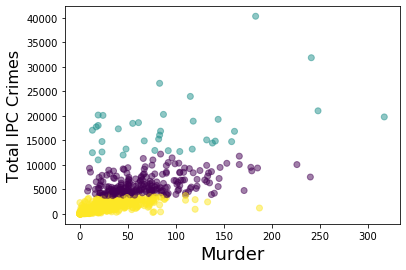

In [18]:
plt.scatter(X[:, 0], X[:, 9],c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Murder', fontsize=18)
plt.ylabel('Total IPC Crimes', fontsize=16)

plt.show()

### Distribution of districts based on Rape and Total IPC Crimes

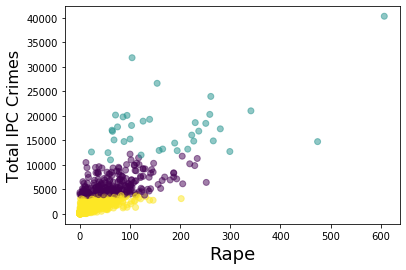

In [19]:
plt.scatter(X[:, 1], X[:, 9],c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Rape', fontsize=18)
plt.ylabel('Total IPC Crimes', fontsize=16)

plt.show()

### Distribution of districts based on Sexual Harassment and Total IPC Crimes

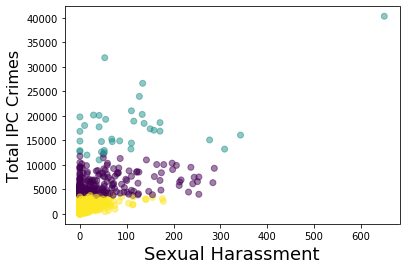

In [20]:
plt.scatter(X[:, 6], X[:, 9],c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Sexual Harassment', fontsize=18)
plt.ylabel('Total IPC Crimes', fontsize=16)

plt.show()